<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 1: Introduction to Credit Card Fraud Analysis</span></div>

In [1]:
# import nltk

In [2]:
# !pip install seaborn --upgrade

In [3]:
# nltk.download('stopwords')

by BYJ Cirio

<div class="alert alert-danger alert-info">
     In this notebook we will be having an overview of the credit card fraud dataset. Specifically, the topics covered are as follows:<br>
    <ol>
        <li>Cleaning and Pre-processing</li>
        <li> Exploratory Data Analysis</li>
        <li>Baselining</li>
        <li><i>Exercise: Generting Insights thru EDA</i></li>
    </ol>
</div>

In [4]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

In [5]:
cc_fraud = pd.read_csv("data/Group2.csv", nrows=2500000)
display(cc_fraud.shape, cc_fraud.head())

(100000, 25)

ssn        cc_num  first      last gender  \
0  0476-2627741-4  3.576610e+15  Steve  Williams      M   
1  0476-2627741-4  3.576610e+15  Steve  Williams      M   
2  0476-2627741-4  3.576610e+15  Steve  Williams      M   
3  0476-2627741-4  3.576610e+15  Steve  Williams      M   
4  0476-2627741-4  3.576610e+15  Steve  Williams      M   

                           street              city state     zip      lat  \
0  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
1  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
2  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
3  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
4  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   

   ...                         trans_num  trans_date trans_time   unix_time  \
0  ...  8de7e404c5f91bac1d886a570fb8cc6b  10/21/2021   17:52:18  1634838738   
1  ...  edc8b64ae9553673e79ffa6d3400ec6c   8/10/2020   23:19:14  1597101554   
2  ...  98fdd547527157e095d21c64d14d469e  12/15/2020    0:20:41  1607991641   
3  ...  bc2c5d0d3aeb3097d86c23a02e2bd09a   5/17/2020   11:47:50  1589716070   
4  ...  8b940ee36589bc8c5db7a9e026d11883   8/22/2021   15:29:32  1629646172   

         category    amt is_fraud                      merchant  merch_lat  \
0            home  35.16        0  Mandaue Foam Industries Corp  15.288587   
1       kids_pets  69.11        0                   Bioresearch  15.126879   
2     grocery_pos  64.68        0               KCC Supermarket  13.602285   
3     food_dining  87.48        0    Standard Hospitality Group  13.613058   
4  health_fitness   5.53        0            The Upper Deck Gym  14.694617   

   merch_long  
0  120.878945  
1  120.581111  
2  121.657351  
3  121.609547  
4  121.334535  

[5 rows x 25 columns]

In [6]:
cc_fraud['trans_time'] =  pd.to_datetime(cc_fraud['trans_time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [7]:
cc_fraud.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'trans_num',
       'trans_date', 'trans_time', 'unix_time', 'category', 'amt', 'is_fraud',
       'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

In [8]:
pd.set_option('max_columns', None)
cc_fraud = pd.read_csv('data/Group2.csv',nrows=2500000)
cc_fraud['full_name'] = cc_fraud['first'] + ' ' + cc_fraud['last']
print(cc_fraud.shape)
cc_fraud.head()

(100000, 26)


ssn        cc_num  first      last gender  \
0  0476-2627741-4  3.576610e+15  Steve  Williams      M   
1  0476-2627741-4  3.576610e+15  Steve  Williams      M   
2  0476-2627741-4  3.576610e+15  Steve  Williams      M   
3  0476-2627741-4  3.576610e+15  Steve  Williams      M   
4  0476-2627741-4  3.576610e+15  Steve  Williams      M   

                           street              city state     zip      lat  \
0  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
1  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
2  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
3  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   
4  3045 94th Avenue, Comet Cove 7  Mandaluyong City    PH  386276  14.5833   

       long  city_pop                     job        dob      acct_num  \
0  121.0333    386276  Air traffic controller  2/23/1958  3.828640e+11   
1  121.0333    386276  Air traffic controller  2/23/1958  3.828640e+11   
2  121.0333    386276  Air traffic controller  2/23/1958  3.828640e+11   
3  121.0333    386276  Air traffic controller  2/23/1958  3.828640e+11   
4  121.0333    386276  Air traffic controller  2/23/1958  3.828640e+11   

                          trans_num  trans_date trans_time   unix_time  \
0  8de7e404c5f91bac1d886a570fb8cc6b  10/21/2021   17:52:18  1634838738   
1  edc8b64ae9553673e79ffa6d3400ec6c   8/10/2020   23:19:14  1597101554   
2  98fdd547527157e095d21c64d14d469e  12/15/2020    0:20:41  1607991641   
3  bc2c5d0d3aeb3097d86c23a02e2bd09a   5/17/2020   11:47:50  1589716070   
4  8b940ee36589bc8c5db7a9e026d11883   8/22/2021   15:29:32  1629646172   

         category    amt  is_fraud                      merchant  merch_lat  \
0            home  35.16         0  Mandaue Foam Industries Corp  15.288587   
1       kids_pets  69.11         0                   Bioresearch  15.126879   
2     grocery_pos  64.68         0               KCC Supermarket  13.602285   
3     food_dining  87.48         0    Standard Hospitality Group  13.613058   
4  health_fitness   5.53         0            The Upper Deck Gym  14.694617   

   merch_long       full_name  
0  120.878945  Steve Williams  
1  120.581111  Steve Williams  
2  121.657351  Steve Williams  
3  121.609547  Steve Williams  
4  121.334535  Steve Williams

In [9]:
cc_fraud[['cc_num', 'full_name']]

cc_num       full_name
0      3.576610e+15  Steve Williams
1      3.576610e+15  Steve Williams
2      3.576610e+15  Steve Williams
3      3.576610e+15  Steve Williams
4      3.576610e+15  Steve Williams
...             ...             ...
99995  3.576490e+15      Scott Cole
99996  3.576490e+15      Scott Cole
99997  3.576490e+15      Scott Cole
99998  3.576490e+15      Scott Cole
99999  3.576490e+15      Scott Cole

[100000 rows x 2 columns]

In [10]:
cc_fraud['trans_time'] =  pd.to_datetime(cc_fraud['trans_time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [11]:
cc_fraud['full_name'].value_counts()

Terry Figueroa    2126
Gabriel Bowen     2124
Joseph Robles     2123
Eric Miller       2123
Mark Guerrero     2122
                  ... 
Cesar Gordon         9
Raymond Castro       9
Robert Nixon         9
Caleb Weber          9
Joseph Grant         8
Name: full_name, Length: 90, dtype: int64

In [12]:
cc_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ssn         100000 non-null  object 
 1   cc_num      100000 non-null  float64
 2   first       100000 non-null  object 
 3   last        100000 non-null  object 
 4   gender      100000 non-null  object 
 5   street      100000 non-null  object 
 6   city        100000 non-null  object 
 7   state       100000 non-null  object 
 8   zip         100000 non-null  int64  
 9   lat         100000 non-null  float64
 10  long        100000 non-null  float64
 11  city_pop    100000 non-null  int64  
 12  job         100000 non-null  object 
 13  dob         100000 non-null  object 
 14  acct_num    100000 non-null  float64
 15  trans_num   100000 non-null  object 
 16  trans_date  100000 non-null  object 
 17  trans_time  100000 non-null  object 
 18  unix_time   100000 non-null  int64  
 19  cat

In [13]:
cc_fraud.describe()

cc_num           zip            lat           long      city_pop  \
count  1.000000e+05  1.000000e+05  100000.000000  100000.000000  1.000000e+05   
mean   3.321621e+17  4.108331e+05      12.460758     122.399865  1.016026e+06   
std    1.195530e+18  3.728444e+05       3.069083       1.958373  3.777873e+06   
min    5.020180e+11  4.104100e+04       6.116700     118.750000  4.104100e+04   
25%    1.801000e+14  1.541370e+05       9.750000     121.000000  1.681100e+05   
50%    3.500630e+15  3.298740e+05      14.316700     121.162200  3.298740e+05   
75%    4.088670e+15  5.618750e+05      14.595800     124.250000  5.618750e+05   
max    4.942700e+18  1.780148e+06      18.200000     126.233300  2.308800e+07   

           acct_num     unix_time           amt       is_fraud      merch_lat  \
count  1.000000e+05  1.000000e+05  100000.00000  100000.000000  100000.000000   
mean   5.283304e+11  1.609253e+09      70.78651       0.008580      12.458811   
std    2.724215e+11  1.714620e+07     198.14014       0.092231       3.125092   
min    3.220896e+10  1.577837e+09       1.00000       0.000000       5.118857   
25%    3.050580e+11  1.594587e+09       8.77000       0.000000       9.687389   
50%    5.069400e+11  1.608434e+09      49.16000       0.000000      13.801381   
75%    7.913840e+11  1.624417e+09      85.63000       0.000000      14.824655   
max    9.989010e+11  1.638835e+09   26026.62000       1.000000      19.199242   

          merch_long  
count  100000.000000  
mean      122.398889  
std         2.044546  
min       117.752808  
25%       120.798429  
50%       121.682243  
75%       124.195714  
max       127.229787

In [14]:
cc_fraud[['cc_num', 'acct_num', 'full_name']]

cc_num      acct_num       full_name
0      3.576610e+15  3.828640e+11  Steve Williams
1      3.576610e+15  3.828640e+11  Steve Williams
2      3.576610e+15  3.828640e+11  Steve Williams
3      3.576610e+15  3.828640e+11  Steve Williams
4      3.576610e+15  3.828640e+11  Steve Williams
...             ...           ...             ...
99995  3.576490e+15  2.867420e+11      Scott Cole
99996  3.576490e+15  2.867420e+11      Scott Cole
99997  3.576490e+15  2.867420e+11      Scott Cole
99998  3.576490e+15  2.867420e+11      Scott Cole
99999  3.576490e+15  2.867420e+11      Scott Cole

[100000 rows x 3 columns]

In [15]:
# cc_fraud.isnull().count()

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

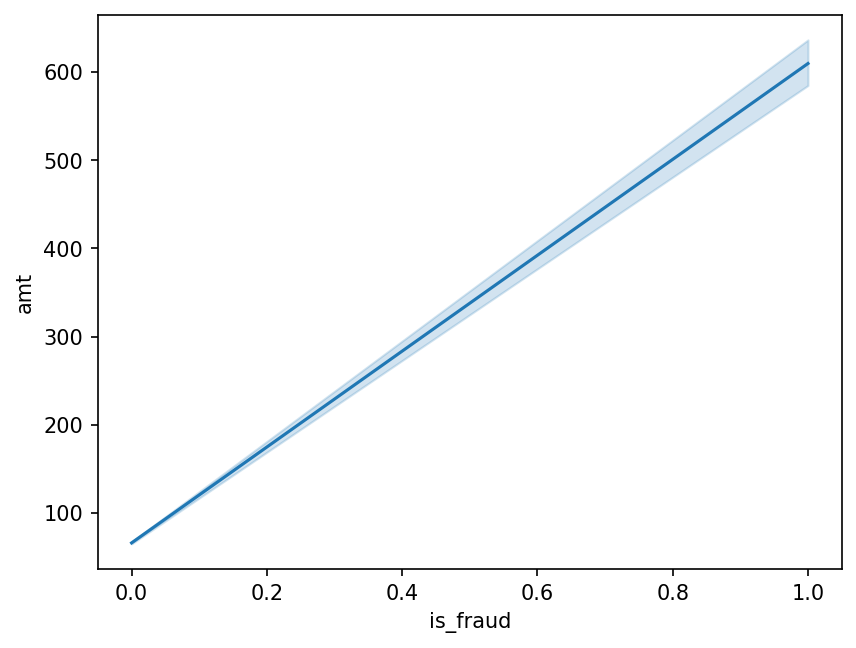

In [16]:
plt.figure(dpi = 150)
sns.lineplot(data=cc_fraud, x = 'is_fraud', y = 'amt')

In [17]:
# plt.figure(dpi=150)
# sns.lineplot(data=cc_fraud)

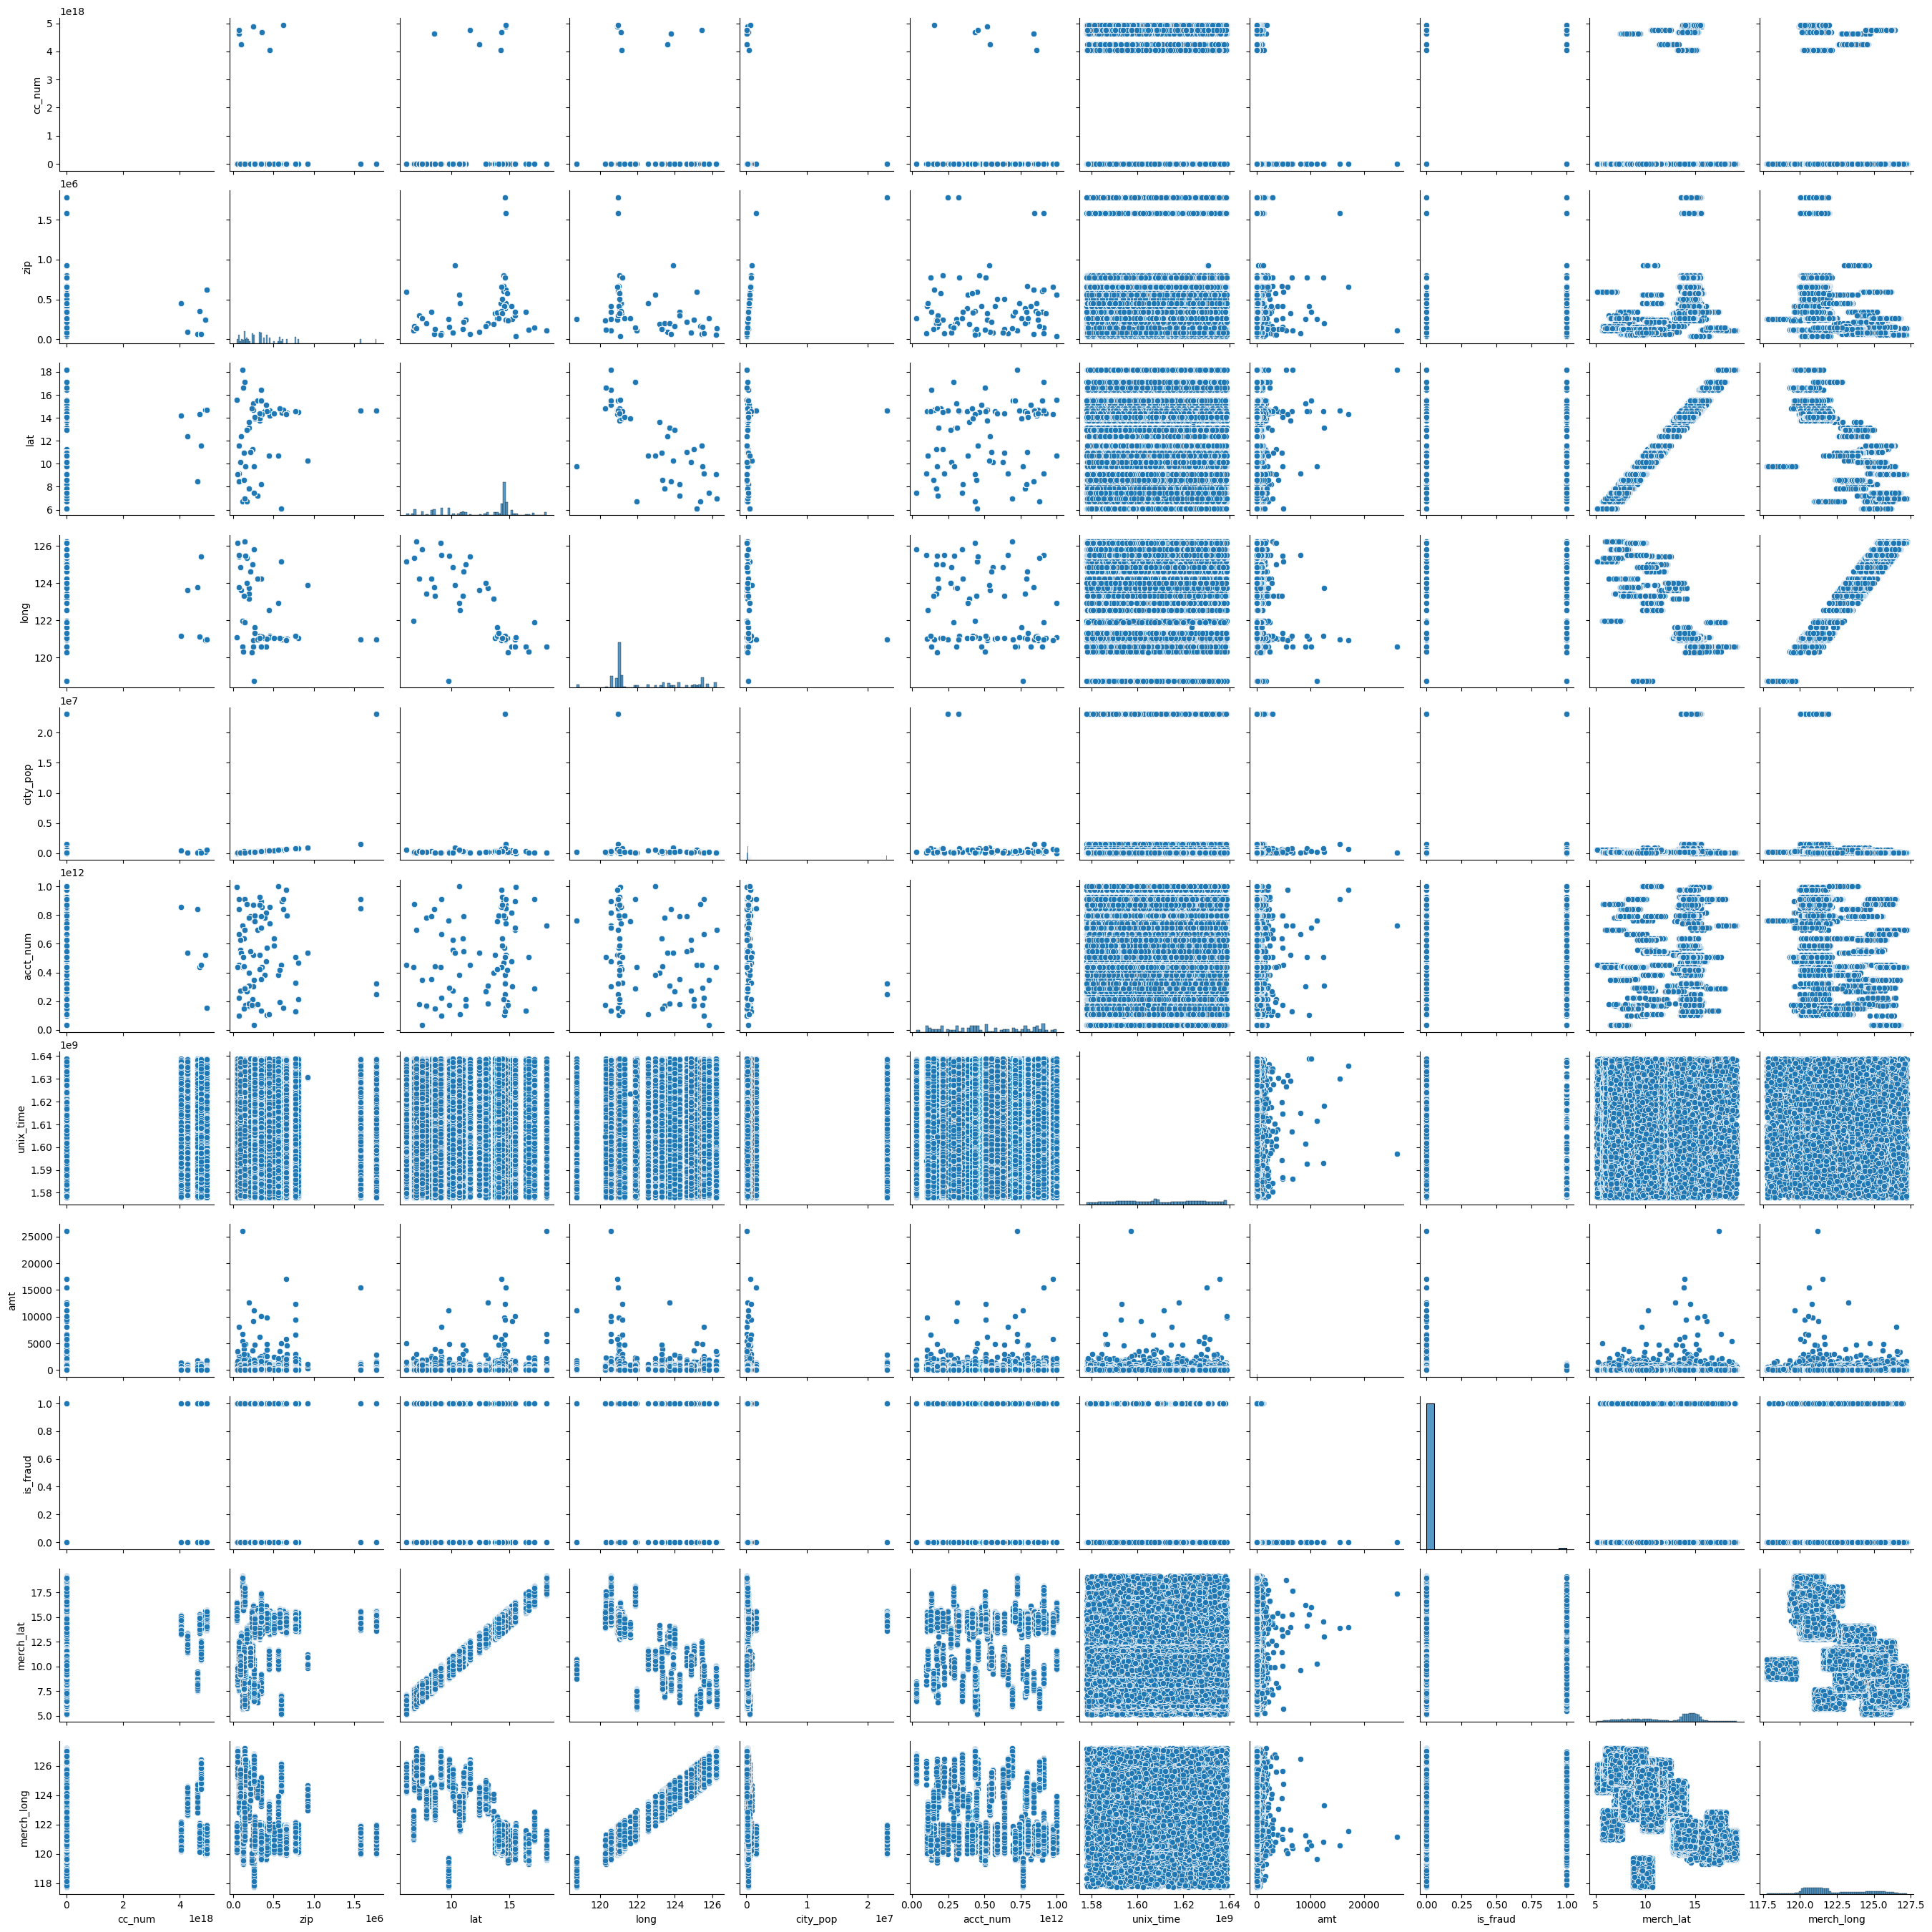

In [18]:
sns.pairplot(data=cc_fraud)

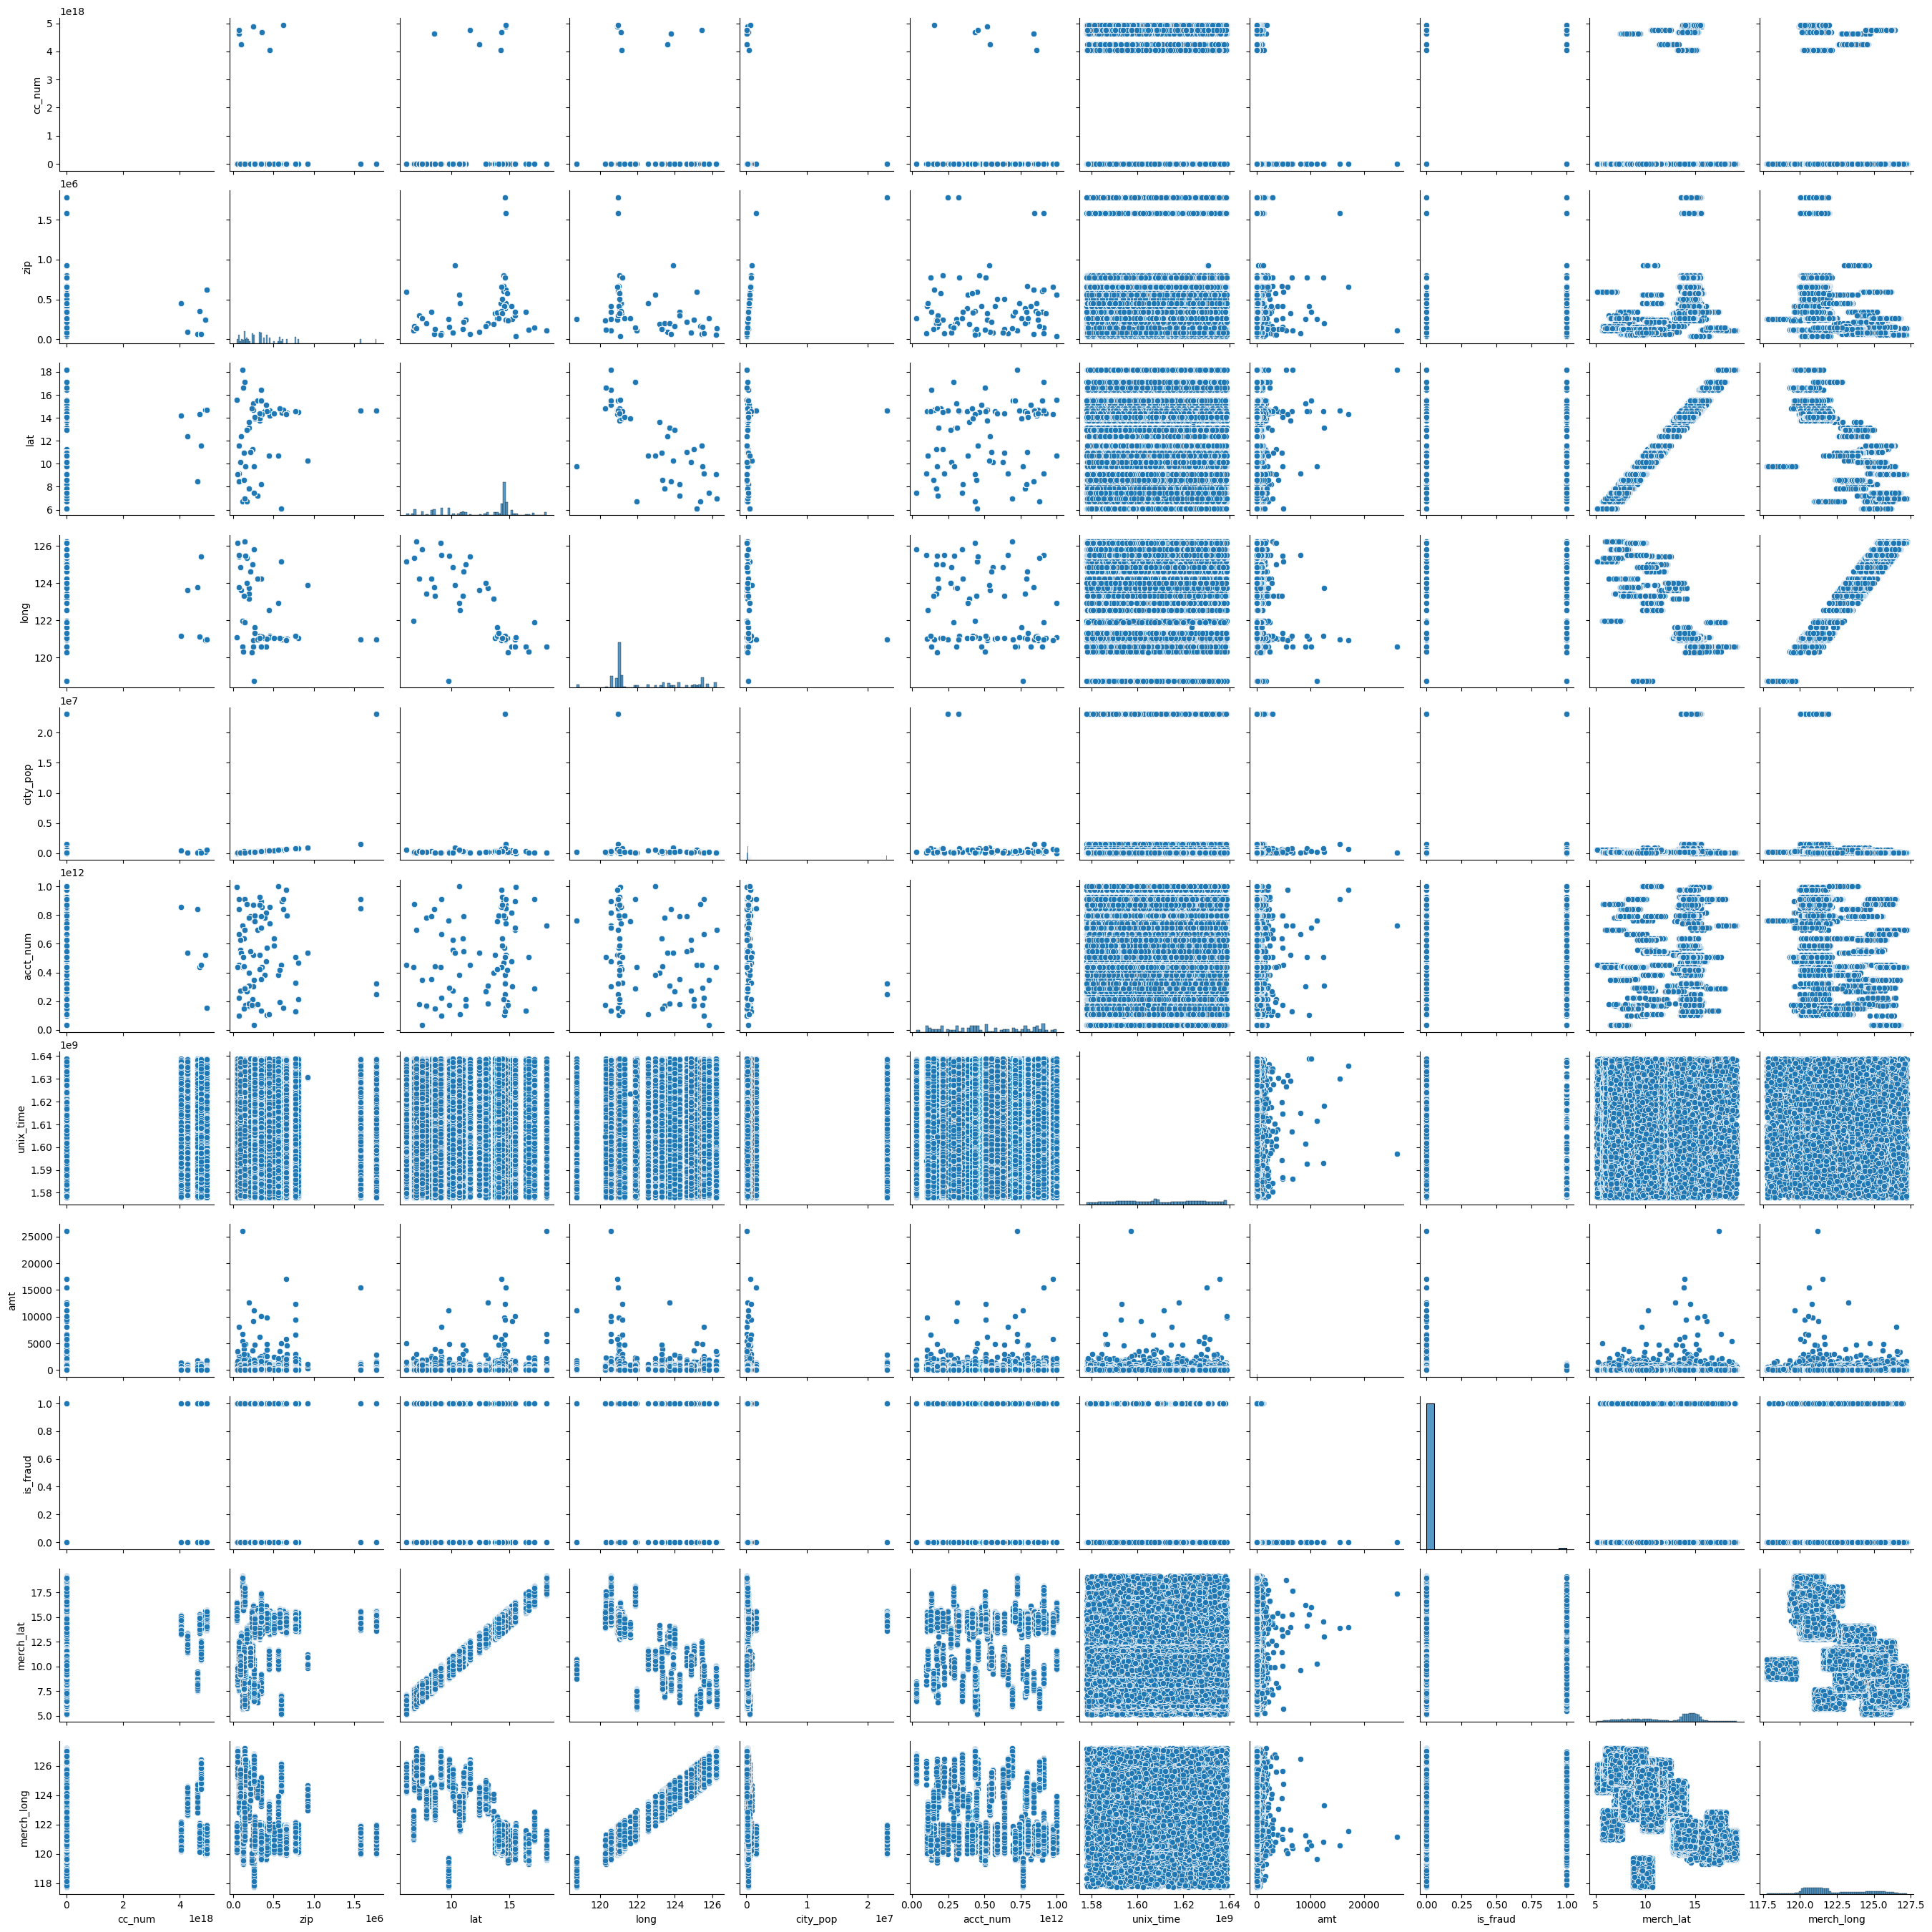

In [19]:
sns.pairplot(data=cc_fraud)

### 1. Drop Unnecessary Variables

In [21]:
to_drop = ['ssn', 'cc_num', 'first', 'last', 'street', 'state', 'zip', 'acct_num', 'trans_num', 'unix_time', 'full_name']
cc_clean = cc_fraud.drop(to_drop, axis=1)
cc_clean.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job        dob  trans_date trans_time        category  \
0  Air traffic controller  2/23/1958  10/21/2021   17:52:18            home   
1  Air traffic controller  2/23/1958   8/10/2020   23:19:14       kids_pets   
2  Air traffic controller  2/23/1958  12/15/2020   00:20:41     grocery_pos   
3  Air traffic controller  2/23/1958   5/17/2020   11:47:50     food_dining   
4  Air traffic controller  2/23/1958   8/22/2021   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945  
1  69.11         0                   Bioresearch  15.126879  120.581111  
2  64.68         0               KCC Supermarket  13.602285  121.657351  
3  87.48         0    Standard Hospitality Group  13.613058  121.609547  
4   5.53         0            The Upper Deck Gym  14.694617  121.334535

### 2. Clean Date and Time

In [22]:
cc_clean['trans_time']

0        17:52:18
1        23:19:14
2        00:20:41
3        11:47:50
4        15:29:32
           ...   
99995    04:15:03
99996    16:51:41
99997    19:50:11
99998    10:38:19
99999    18:36:23
Name: trans_time, Length: 100000, dtype: object

In [23]:
cc_clean.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job        dob  trans_date trans_time        category  \
0  Air traffic controller  2/23/1958  10/21/2021   17:52:18            home   
1  Air traffic controller  2/23/1958   8/10/2020   23:19:14       kids_pets   
2  Air traffic controller  2/23/1958  12/15/2020   00:20:41     grocery_pos   
3  Air traffic controller  2/23/1958   5/17/2020   11:47:50     food_dining   
4  Air traffic controller  2/23/1958   8/22/2021   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945  
1  69.11         0                   Bioresearch  15.126879  120.581111  
2  64.68         0               KCC Supermarket  13.602285  121.657351  
3  87.48         0    Standard Hospitality Group  13.613058  121.609547  
4   5.53         0            The Upper Deck Gym  14.694617  121.334535

In [24]:
# pre-processing time
# transaction date
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day

# transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].str[:2].astype(int) #.astype(float)

# convert month to string
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cc_clean['trans_month_str'] = cc_clean['trans_month'].map(month_map)

# convert time to part of day
def get_part_of_day(hour):
    """Return the part of day given the hour of day"""
    if (hour > 22) or (hour <= 6):
        return 'early morning'
    elif hour <= 11:
        return 'breakfast'
    elif hour <= 14:
        return 'lunch'
    elif hour <= 17:
        return 'afternoon'
    else:
        return 'dinner'
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)
cc_clean.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job        dob  trans_date trans_time        category  \
0  Air traffic controller  2/23/1958  2021-10-21   17:52:18            home   
1  Air traffic controller  2/23/1958  2020-08-10   23:19:14       kids_pets   
2  Air traffic controller  2/23/1958  2020-12-15   00:20:41     grocery_pos   
3  Air traffic controller  2/23/1958  2020-05-17   11:47:50     food_dining   
4  Air traffic controller  2/23/1958  2021-08-22   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  \
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945   
1  69.11         0                   Bioresearch  15.126879  120.581111   
2  64.68         0               KCC Supermarket  13.602285  121.657351   
3  87.48         0    Standard Hospitality Group  13.613058  121.609547   
4   5.53         0            The Upper Deck Gym  14.694617  121.334535   

  trans_datetime trans_year  trans_month  trans_day  trans_hour  \
0     2021-10-21       2021           10         21          17   
1     2020-08-10       2020            8         10          23   
2     2020-12-15       2020           12         15           0   
3     2020-05-17       2020            5         17          11   
4     2021-08-22       2021            8         22          15   

  trans_month_str    part_of_day  
0             Oct      afternoon  
1             Aug  early morning  
2             Dec  early morning  
3             May      breakfast  
4             Aug      afternoon

### 3. Age

In [25]:
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
#^somewhat like creating temp variable
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)
cc_clean.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job         dob  trans_date trans_time        category  \
0  Air traffic controller  1958-02-23  2021-10-21   17:52:18            home   
1  Air traffic controller  1958-02-23  2020-08-10   23:19:14       kids_pets   
2  Air traffic controller  1958-02-23  2020-12-15   00:20:41     grocery_pos   
3  Air traffic controller  1958-02-23  2020-05-17   11:47:50     food_dining   
4  Air traffic controller  1958-02-23  2021-08-22   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  \
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945   
1  69.11         0                   Bioresearch  15.126879  120.581111   
2  64.68         0               KCC Supermarket  13.602285  121.657351   
3  87.48         0    Standard Hospitality Group  13.613058  121.609547   
4   5.53         0            The Upper Deck Gym  14.694617  121.334535   

  trans_datetime trans_year  trans_month  trans_day  trans_hour  \
0     2021-10-21       2021           10         21          17   
1     2020-08-10       2020            8         10          23   
2     2020-12-15       2020           12         15           0   
3     2020-05-17       2020            5         17          11   
4     2021-08-22       2021            8         22          15   

  trans_month_str    part_of_day dob_datetime  age  
0             Oct      afternoon   1958-02-23   63  
1             Aug  early morning   1958-02-23   62  
2             Dec  early morning   1958-02-23   62  
3             May      breakfast   1958-02-23   62  
4             Aug      afternoon   1958-02-23   63

### 4. Retain final columns

In [26]:
to_drop2 = ['dob', 'trans_date', 'trans_time', 'trans_datetime', 'trans_month', 'trans_hour', 'dob_datetime']
cc_final = cc_clean.drop(to_drop2, axis=1)
cc_final.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job        category    amt  is_fraud  \
0  Air traffic controller            home  35.16         0   
1  Air traffic controller       kids_pets  69.11         0   
2  Air traffic controller     grocery_pos  64.68         0   
3  Air traffic controller     food_dining  87.48         0   
4  Air traffic controller  health_fitness   5.53         0   

                       merchant  merch_lat  merch_long trans_year  trans_day  \
0  Mandaue Foam Industries Corp  15.288587  120.878945       2021         21   
1                   Bioresearch  15.126879  120.581111       2020         10   
2               KCC Supermarket  13.602285  121.657351       2020         15   
3    Standard Hospitality Group  13.613058  121.609547       2020         17   
4            The Upper Deck Gym  14.694617  121.334535       2021         22   

  trans_month_str    part_of_day  age  
0             Oct      afternoon   63  
1             Aug  early morning   62  
2             Dec  early morning   62  
3             May      breakfast   62  
4             Aug      afternoon   63

In [27]:
cc_final

gender              city      lat      long  city_pop  \
0          M  Mandaluyong City  14.5833  121.0333    386276   
1          M  Mandaluyong City  14.5833  121.0333    386276   
2          M  Mandaluyong City  14.5833  121.0333    386276   
3          M  Mandaluyong City  14.5833  121.0333    386276   
4          M  Mandaluyong City  14.5833  121.0333    386276   
...      ...               ...      ...       ...       ...   
99995      M            Ilagan  17.1333  121.8833    145568   
99996      M            Ilagan  17.1333  121.8833    145568   
99997      M            Ilagan  17.1333  121.8833    145568   
99998      M            Ilagan  17.1333  121.8833    145568   
99999      M            Ilagan  17.1333  121.8833    145568   

                          job        category    amt  is_fraud  \
0      Air traffic controller            home  35.16         0   
1      Air traffic controller       kids_pets  69.11         0   
2      Air traffic controller     grocery_pos  64.68         0   
3      Air traffic controller     food_dining  87.48         0   
4      Air traffic controller  health_fitness   5.53         0   
...                       ...             ...    ...       ...   
99995     Structural engineer    shopping_net  38.07         0   
99996     Structural engineer            home   7.50         0   
99997     Structural engineer            home  22.72         0   
99998     Structural engineer    shopping_pos   4.04         0   
99999     Structural engineer            home  13.50         0   

                            merchant  merch_lat  merch_long trans_year  \
0       Mandaue Foam Industries Corp  15.288587  120.878945       2021   
1                        Bioresearch  15.126879  120.581111       2020   
2                    KCC Supermarket  13.602285  121.657351       2020   
3         Standard Hospitality Group  13.613058  121.609547       2020   
4                 The Upper Deck Gym  14.694617  121.334535       2021   
...                              ...        ...         ...        ...   
99995                        PoundIt  17.768791  121.291454       2021   
99996                           Ikea  17.514887  122.003029       2020   
99997                        Rustans  17.225069  122.309704       2021   
99998                          Daiso  17.623232  122.500226       2021   
99999  Robinsons Retail Holdings Inc  17.980858  121.206854       2020   

       trans_day trans_month_str    part_of_day  age  
0             21             Oct      afternoon   63  
1             10             Aug  early morning   62  
2             15             Dec  early morning   62  
3             17             May      breakfast   62  
4             22             Aug      afternoon   63  
...          ...             ...            ...  ...  
99995          2             Oct  early morning   87  
99996          2             Oct      afternoon   86  
99997          2             Apr         dinner   87  
99998         27             Mar      breakfast   87  
99999          3             Jul         dinner   86  

[100000 rows x 17 columns]

In [28]:
cc_final.tail()

gender    city      lat      long  city_pop                  job  \
99995      M  Ilagan  17.1333  121.8833    145568  Structural engineer   
99996      M  Ilagan  17.1333  121.8833    145568  Structural engineer   
99997      M  Ilagan  17.1333  121.8833    145568  Structural engineer   
99998      M  Ilagan  17.1333  121.8833    145568  Structural engineer   
99999      M  Ilagan  17.1333  121.8833    145568  Structural engineer   

           category    amt  is_fraud                       merchant  \
99995  shopping_net  38.07         0                        PoundIt   
99996          home   7.50         0                           Ikea   
99997          home  22.72         0                        Rustans   
99998  shopping_pos   4.04         0                          Daiso   
99999          home  13.50         0  Robinsons Retail Holdings Inc   

       merch_lat  merch_long trans_year  trans_day trans_month_str  \
99995  17.768791  121.291454       2021          2             Oct   
99996  17.514887  122.003029       2020          2             Oct   
99997  17.225069  122.309704       2021          2             Apr   
99998  17.623232  122.500226       2021         27             Mar   
99999  17.980858  121.206854       2020          3             Jul   

         part_of_day  age  
99995  early morning   87  
99996      afternoon   86  
99997         dinner   87  
99998      breakfast   87  
99999         dinner   86

In [29]:
cc_final['gender'].count()

100000

In [30]:
cc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   city             100000 non-null  object 
 2   lat              100000 non-null  float64
 3   long             100000 non-null  float64
 4   city_pop         100000 non-null  int64  
 5   job              100000 non-null  object 
 6   category         100000 non-null  object 
 7   amt              100000 non-null  float64
 8   is_fraud         100000 non-null  int64  
 9   merchant         100000 non-null  object 
 10  merch_lat        100000 non-null  float64
 11  merch_long       100000 non-null  float64
 12  trans_year       100000 non-null  object 
 13  trans_day        100000 non-null  int64  
 14  trans_month_str  100000 non-null  object 
 15  part_of_day      100000 non-null  object 
 16  age              100000 non-null  int64

### 5. One-hot encode categorical variables

In [32]:
to_drop3 = []
for col in tqdm(cc_final.columns):
    if cc_final[col].dtype == 'O':
        dummies = pd.get_dummies(cc_final[col], prefix=col, drop_first=False)
        cc_final = pd.concat([cc_final, dummies], axis=1)
        to_drop3.append(col)
cc_final = cc_final.drop(to_drop3, axis=1)
cc_final.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00, 11.02it/s]


lat      long  city_pop    amt  is_fraud  merch_lat  merch_long  \
0  14.5833  121.0333    386276  35.16         0  15.288587  120.878945   
1  14.5833  121.0333    386276  69.11         0  15.126879  120.581111   
2  14.5833  121.0333    386276  64.68         0  13.602285  121.657351   
3  14.5833  121.0333    386276  87.48         0  13.613058  121.609547   
4  14.5833  121.0333    386276   5.53         0  14.694617  121.334535   

   trans_day  age  gender_M  city_Angeles City  city_Antipolo  city_Bacolod  \
0         21   63         1                  0              0             0   
1         10   62         1                  0              0             0   
2         15   62         1                  0              0             0   
3         17   62         1                  0              0             0   
4         22   63         1                  0              0             0   

   city_Bacoor  city_Baguio City  city_Batangas  city_Borongan  \
0            0                 0              0              0   
1            0                 0              0              0   
2            0                 0              0              0   
3            0                 0              0              0   
4            0                 0              0              0   

   city_Cabadbaran  city_Cabanatuan City  city_Cadiz  city_Caloocan City  \
0                0                     0           0                   0   
1                0                     0           0                   0   
2                0                     0           0                   0   
3                0                     0           0                   0   
4                0                     0           0                   0   

   city_Cebu City  city_City of Calamba  city_City of Isabela  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   

   city_City of Paranaque  city_Cotabato  city_Dasmarinas  city_Digos  \
0                       0              0                0           0   
1                       0              0                0           0   
2                       0              0                0           0   
3                       0              0                0           0   
4                       0              0                0           0   

   city_Dipolog  city_General Santos  city_Ilagan  city_Iligan  city_Iloilo  \
0             0                    0            0            0            0   
1             0                    0            0            0            0   
2             0                    0            0            0            0   
3             0                    0            0            0            0   
4             0                    0            0            0            0   

   city_Laoag  city_Legazpi City  city_Lipa City  city_Lucena  city_Maasin  \
0           0                  0               0            0            0   
1           0                  0               0            0            0   
2           0                  0               0            0            0   
3           0                  0               0            0            0   
4           0                  0               0            0            0   

   city_Mabalacat  city_Mandaluyong City  city_Manila  city_Marikina City  \
0               0                      1            0                   0   
1               0                      1            0                   0   
2               0                      1            0                   0   
3               0                      1            0                   0   
4               0                      1            0                   0 

In [33]:
#cc_final.to_csv('cc_df_proj.csv', index=None)

In [34]:
cc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 387 entries, lat to part_of_day_lunch
dtypes: float64(5), int64(4), uint8(378)
memory usage: 42.9 MB


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exploratory Data Analysis </span></div>

### Valid vs Fraud 

valid    99142
fraud      858
Name: Class, dtype: int64

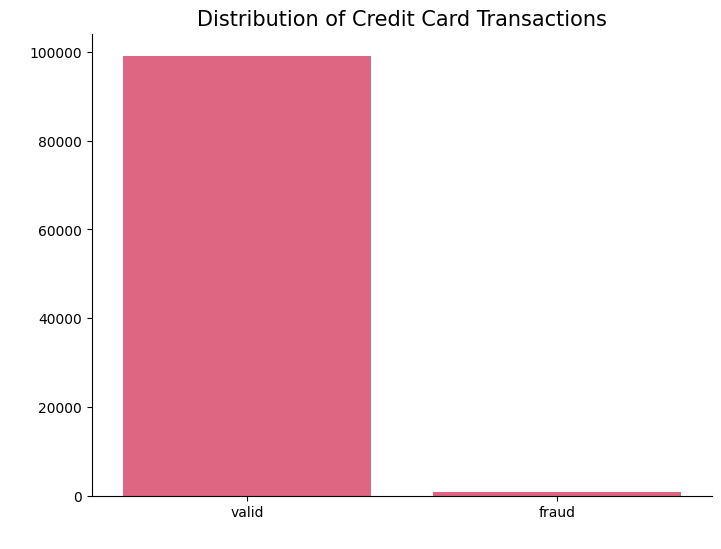

In [35]:
fraud_map = {0: 'valid', 1: 'fraud'}
cc_fraud_eda = cc_clean.copy()
cc_fraud_eda['Class'] = cc_fraud_eda['is_fraud'].map(fraud_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Class'],
              order=cc_fraud_eda['Class'].value_counts().index,
              color="#F25278")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions', size=15, y=1)
display(cc_fraud_eda['Class'].value_counts())
plt.show()

In [36]:
cc_clean.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job         dob  trans_date trans_time        category  \
0  Air traffic controller  1958-02-23  2021-10-21   17:52:18            home   
1  Air traffic controller  1958-02-23  2020-08-10   23:19:14       kids_pets   
2  Air traffic controller  1958-02-23  2020-12-15   00:20:41     grocery_pos   
3  Air traffic controller  1958-02-23  2020-05-17   11:47:50     food_dining   
4  Air traffic controller  1958-02-23  2021-08-22   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  \
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945   
1  69.11         0                   Bioresearch  15.126879  120.581111   
2  64.68         0               KCC Supermarket  13.602285  121.657351   
3  87.48         0    Standard Hospitality Group  13.613058  121.609547   
4   5.53         0            The Upper Deck Gym  14.694617  121.334535   

  trans_datetime trans_year  trans_month  trans_day  trans_hour  \
0     2021-10-21       2021           10         21          17   
1     2020-08-10       2020            8         10          23   
2     2020-12-15       2020           12         15           0   
3     2020-05-17       2020            5         17          11   
4     2021-08-22       2021            8         22          15   

  trans_month_str    part_of_day dob_datetime  age  
0             Oct      afternoon   1958-02-23   63  
1             Aug  early morning   1958-02-23   62  
2             Dec  early morning   1958-02-23   62  
3             May      breakfast   1958-02-23   62  
4             Aug      afternoon   1958-02-23   63

valid    99142
fraud      858
Name: Class, dtype: int64

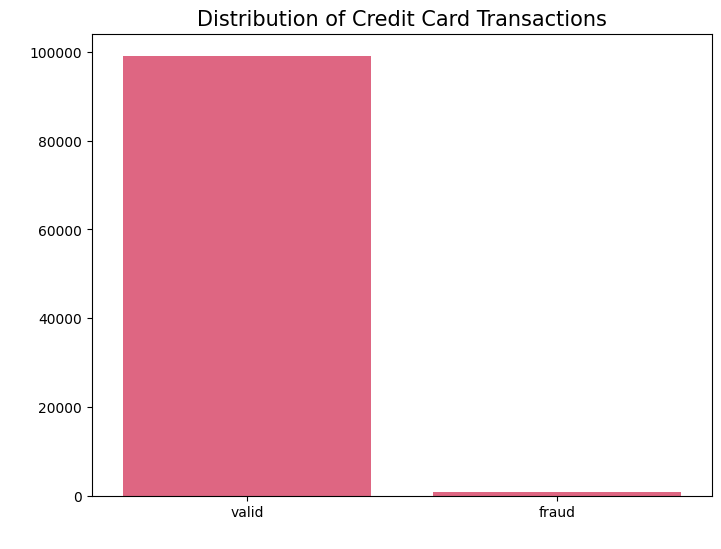

In [37]:
fraud_map = {0: 'valid', 1: 'fraud'}
cc_fraud_eda = cc_clean.copy()
cc_fraud_eda['Class'] = cc_fraud_eda['is_fraud'].map(fraud_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Class'],
              order=cc_fraud_eda['Class'].value_counts().index,
              color="#F25278")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
#for spine in ['right', 'top']:
#    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions', size=15, y=1)
display(cc_fraud_eda['Class'].value_counts())
plt.show()

In [38]:
cc_fraud_eda.head()

gender              city      lat      long  city_pop  \
0      M  Mandaluyong City  14.5833  121.0333    386276   
1      M  Mandaluyong City  14.5833  121.0333    386276   
2      M  Mandaluyong City  14.5833  121.0333    386276   
3      M  Mandaluyong City  14.5833  121.0333    386276   
4      M  Mandaluyong City  14.5833  121.0333    386276   

                      job         dob  trans_date trans_time        category  \
0  Air traffic controller  1958-02-23  2021-10-21   17:52:18            home   
1  Air traffic controller  1958-02-23  2020-08-10   23:19:14       kids_pets   
2  Air traffic controller  1958-02-23  2020-12-15   00:20:41     grocery_pos   
3  Air traffic controller  1958-02-23  2020-05-17   11:47:50     food_dining   
4  Air traffic controller  1958-02-23  2021-08-22   15:29:32  health_fitness   

     amt  is_fraud                      merchant  merch_lat  merch_long  \
0  35.16         0  Mandaue Foam Industries Corp  15.288587  120.878945   
1  69.11         0                   Bioresearch  15.126879  120.581111   
2  64.68         0               KCC Supermarket  13.602285  121.657351   
3  87.48         0    Standard Hospitality Group  13.613058  121.609547   
4   5.53         0            The Upper Deck Gym  14.694617  121.334535   

  trans_datetime trans_year  trans_month  trans_day  trans_hour  \
0     2021-10-21       2021           10         21          17   
1     2020-08-10       2020            8         10          23   
2     2020-12-15       2020           12         15           0   
3     2020-05-17       2020            5         17          11   
4     2021-08-22       2021            8         22          15   

  trans_month_str    part_of_day dob_datetime  age  Class  
0             Oct      afternoon   1958-02-23   63  valid  
1             Aug  early morning   1958-02-23   62  valid  
2             Dec  early morning   1958-02-23   62  valid  
3             May      breakfast   1958-02-23   62  valid  
4             Aug      afternoon   1958-02-23   63  valid

### Gender

Male    100000
Name: Gender_, dtype: int64

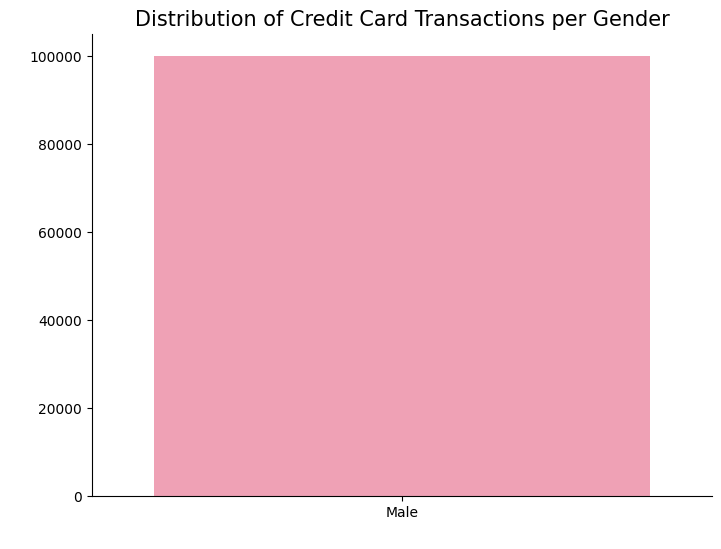

In [39]:
gender_map = {'M': 'Male', 'F': 'Female'}
cc_fraud_eda['Gender_'] = cc_fraud_eda['gender'].map(gender_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Gender_'],
              order=cc_fraud_eda['Gender_'].value_counts().index,
              color="#FC94AF")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions per Gender', size=15, y=1)
display(cc_fraud_eda['Gender_'].value_counts())
plt.show()

### Location

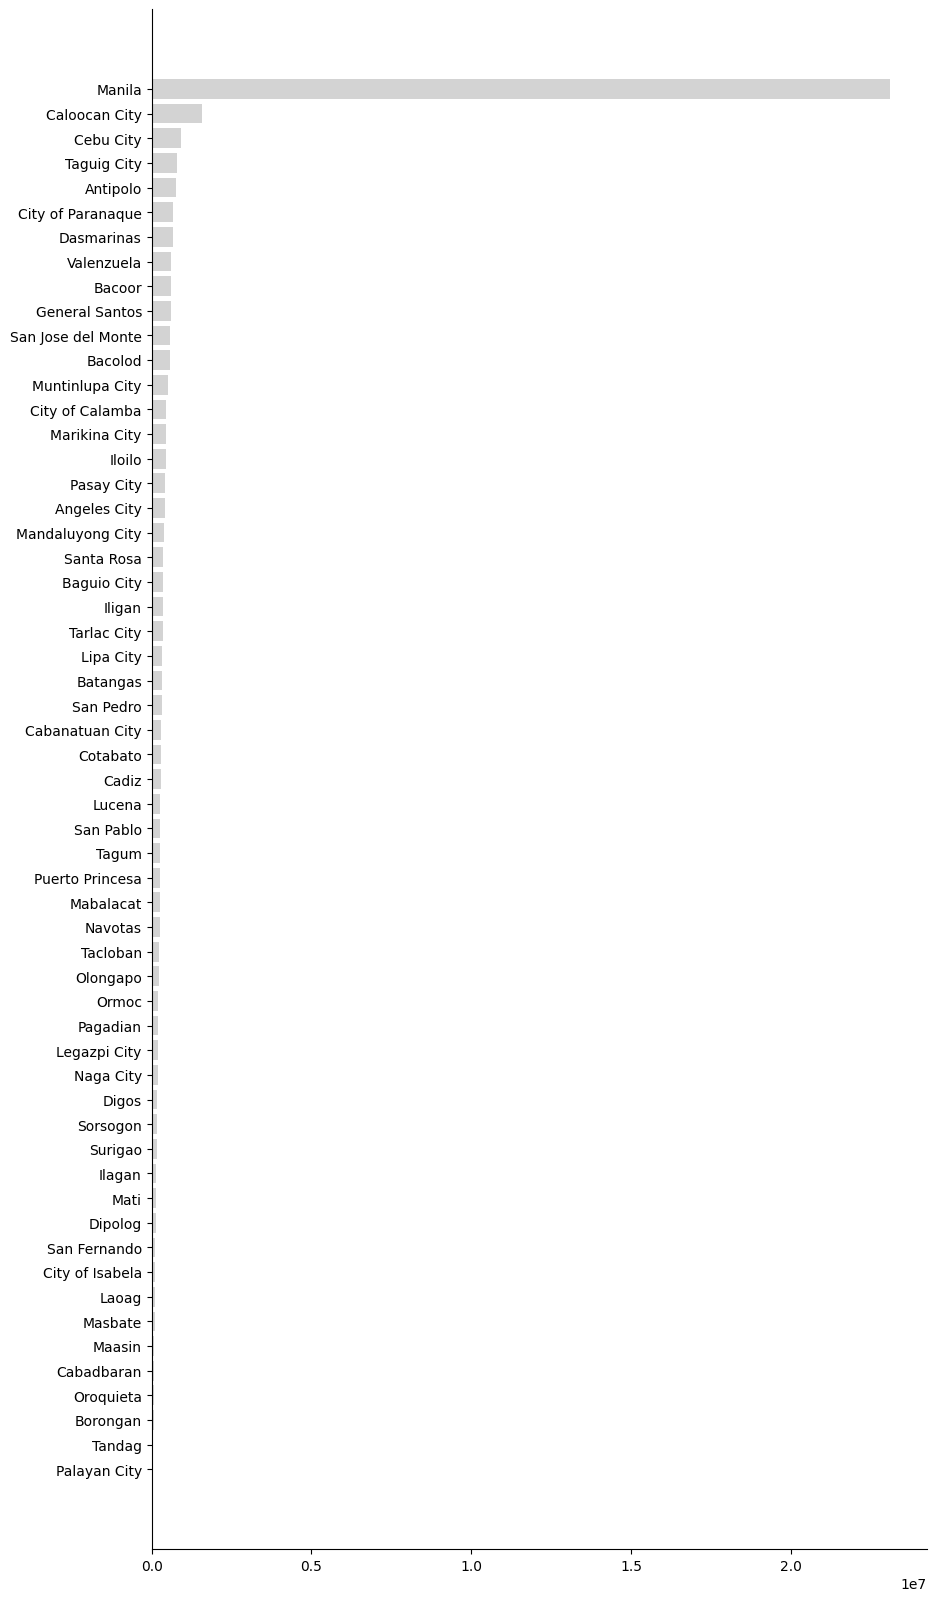

In [40]:
cc_city = cc_fraud_eda.drop_duplicates(subset=['city']).reset_index(drop=True).sort_values(['city_pop'])

colors_l = ['lightgray'] * 85
colors_l[-3:] = ['#ff0257'] * 4

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city.city, cc_city.city_pop, color=colors_l)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

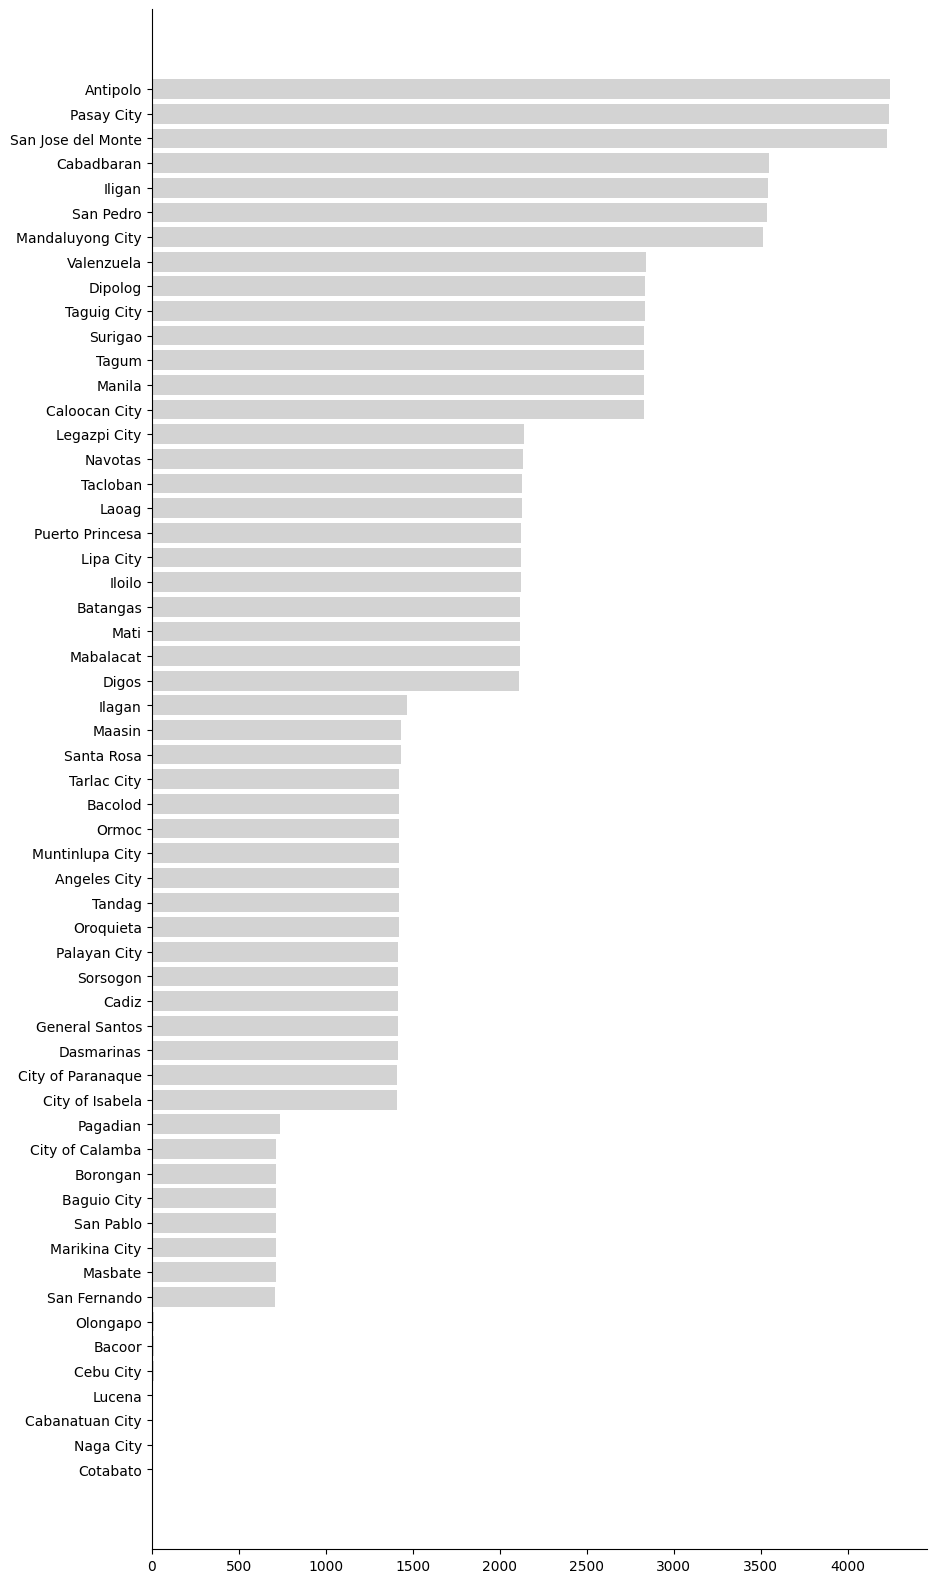

In [41]:
cc_city_2 = pd.DataFrame({'trans_count': cc_fraud_eda['city'].value_counts().sort_values()})

colors_h = ['lightgray'] * 85
colors_h[-2:] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city_2.index, cc_city_2.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

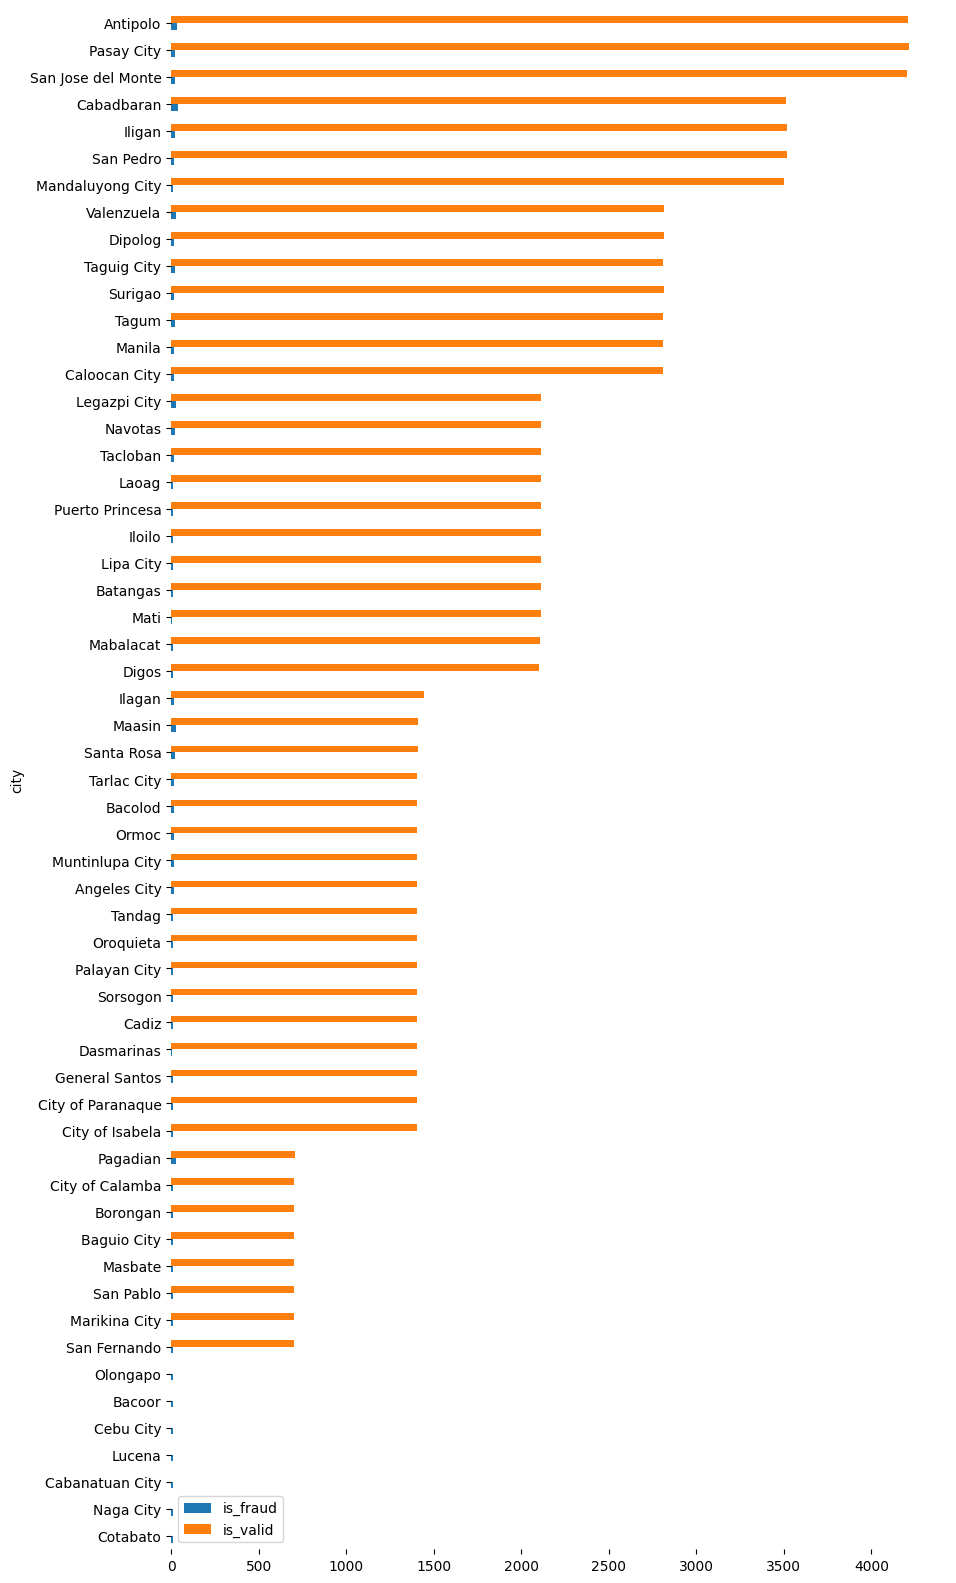

In [42]:
cc_city_3 = pd.DataFrame(cc_fraud_eda.groupby('city')['is_fraud'].sum())
cc_city_3 = cc_city_3.join(cc_city_2).sort_values(['trans_count'])
cc_city_3['is_valid'] = cc_city_3['trans_count'] - cc_city_3['is_fraud']
cc_city_3 = cc_city_3[['is_fraud', 'is_valid']]

cc_city_3.plot.barh(figsize=(10,20))
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.show()

### Jobs

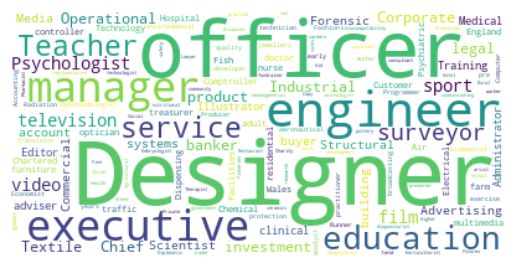

In [43]:
cc_jobs = cc_fraud.drop_duplicates(subset=['full_name']).reset_index(drop=True)

words = []
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                      collocations=False, contour_width=2,
                     ).generate(jobs_list)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

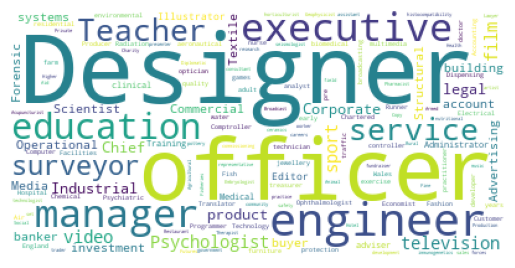

In [44]:
cc_jobs = cc_fraud.drop_duplicates(subset=['full_name']).reset_index(drop=True)

words = []
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                      collocations=False, contour_width=2,
                     ).generate(jobs_list)
plt.imshow(wordcloud)#, interpolation="bilinear")
plt.axis('off');

### Merchant Category

In [45]:
fig, ax = plt.subplots(figsize=(20, 6))

colors_mc = ['lightgray'] * 85
colors_mc[:5] = ['#FD5DA8'] * 5

cc_mc = pd.DataFrame(cc_fraud_eda['category'].value_counts())

ax.bar(cc_mc.index, cc_mc.category, color=colors_mc)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Category', size=15, y=1)
plt.show()

### Date

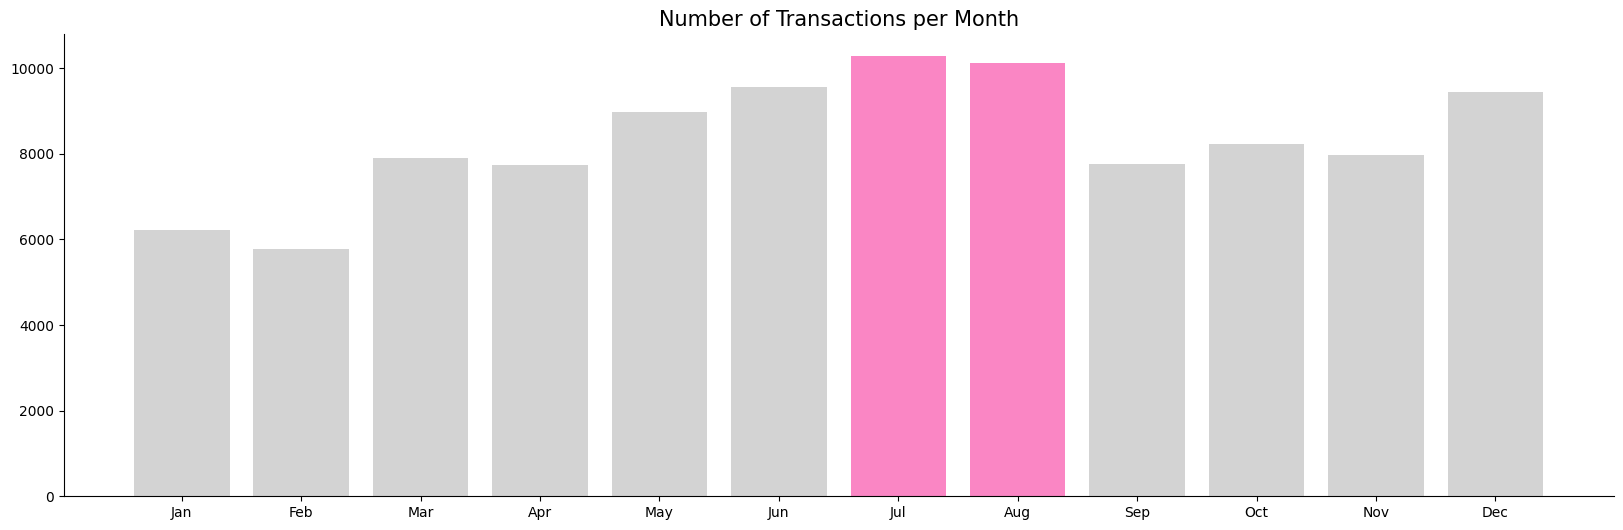

In [46]:
date = pd.DataFrame(cc_fraud_eda['trans_month_str'].value_counts()).reset_index().sort_values(['index'])
map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', 'trans_month_str']]
map_month.columns = ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['lightgray'] * 12
colors_d[6:8] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(cc_date['index'], cc_date.trans_month_str, color=colors_d)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Month', size=15, y=1)
plt.show()

### Transaction Amount

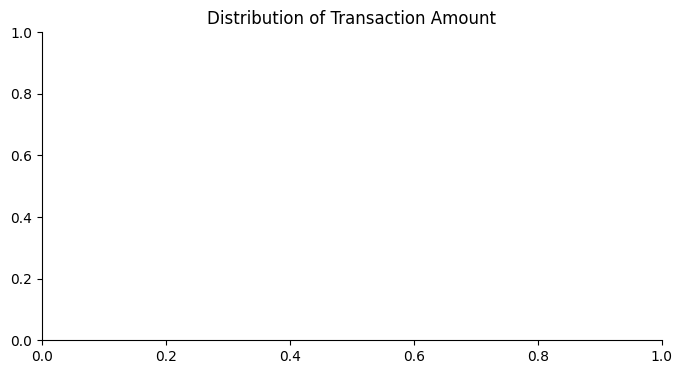

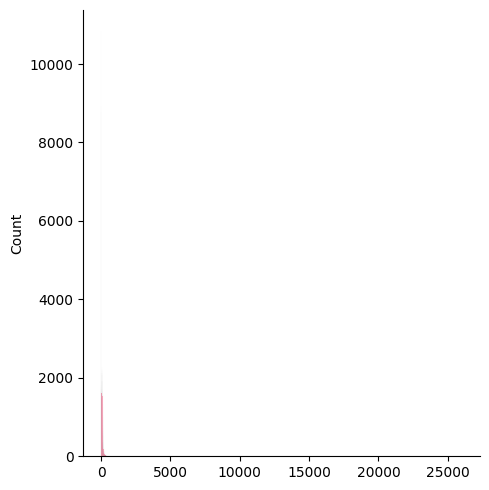

In [78]:
fig, ax = plt.subplots(figsize=(8,4))
sns.displot(cc_fraud_eda['amt'].values, ax=ax, color="#FC94AF", binwidth=3)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Transaction Amount')
plt.show()

### Correlation

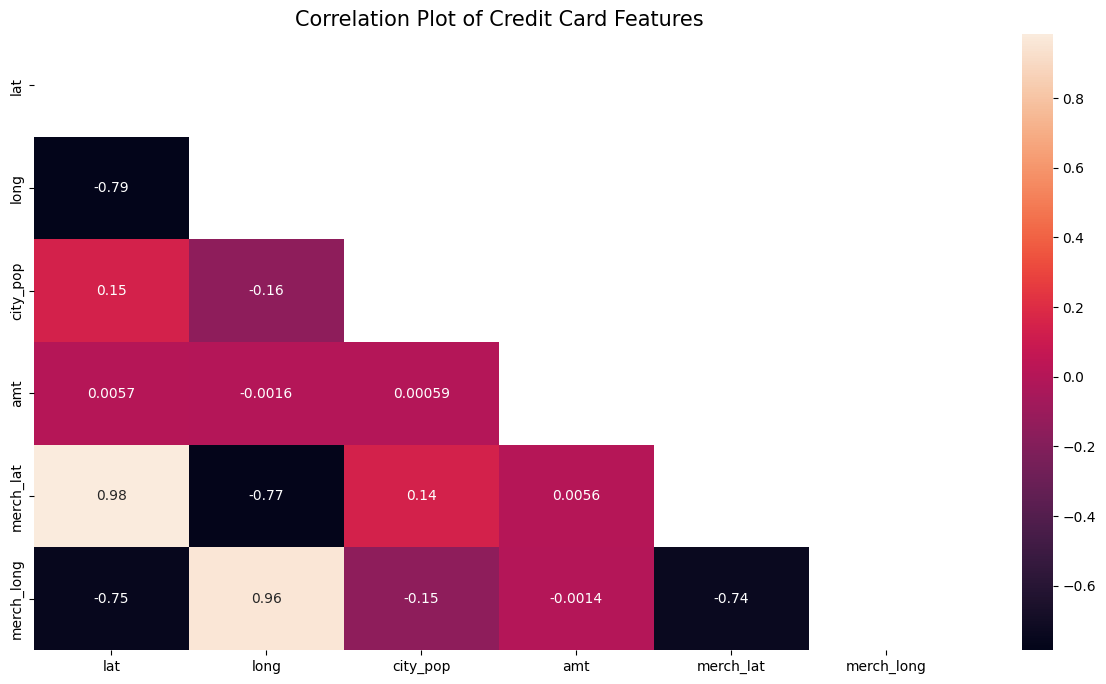

In [79]:
quant = cc_fraud_eda[['lat', 'long', 'city_pop', 'amt', 'merch_lat', 'merch_long']]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Baselining </span></div>

In [80]:
df_target = cc_final['is_fraud']
state_counts = Counter(df_target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num=(df_state[0]/df_state[0].sum())**2
print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion: 98.30%
1.25 * Proportion Chance Criterion: 122.87%


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exercise </span></div>

## What if we group the city per region, what region has the highest number of transactions? valid? fraud? population? transaction amount?

We have explored and interpreted some charactertistics of the credit card fraud dataset. Now, it's your turn to generate interesting insights! Here are some of the things that you can explore but feel free to add anything you can think of :)
- What if we group the city per region, what region has the highest number of transactions? valid? fraud? population? transaction amount?
- What year, day of week, time of day has the highest number of transactions? transaction amount?
- What merchant has the highest number of transactions? transaction amount?
- What is the distribution of age? 
- What are the descriptive statistics (mean, max, min) and distribution of the quantitative variables?

## What year, day of week, time of day has the highest number of transactions? transaction amount?

## What merchant has the highest number of transactions? transaction amount?

## What time of day has the most number of fraud transacitons? 

## What is the distribution of age? 

<AxesSubplot:xlabel='age', ylabel='Density'>

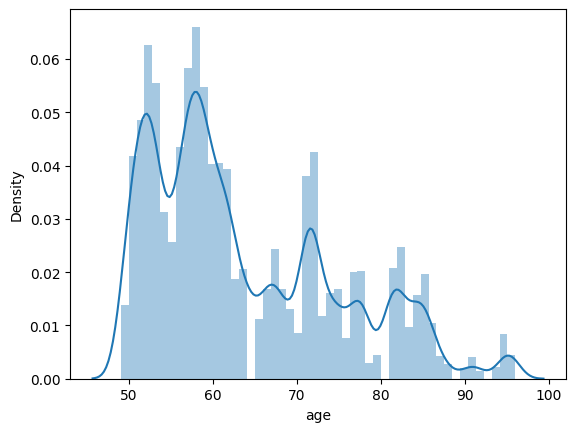

In [81]:
sns.distplot(cc_clean['age'])

## What are the descriptive statistics (mean, max, min) and distribution of the quantitative variables?